In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import cv2

#matplotlib.use('TkAgg') # para que se muestren los graficos em una ventana 
import trackpy as tp
import pandas as pd
import pims
from pandas import DataFrame, Series

frames = pims.ImageSequence(r'E:\tfg\imagenes\particles*.tif')

print(len(frames)) 
print(frames[0])
print(frames[0].shape)

854
[[224 297 283 ... 155 201 221]
 [286 275 260 ... 209 213 201]
 [271 264 260 ... 189 180 193]
 ...
 [283 256 229 ... 443 430 443]
 [271 275 268 ... 433 461 440]
 [264 237 201 ... 458 443 449]]
(800, 832)


Frame([[224, 297, 283, ..., 155, 201, 221],
       [286, 275, 260, ..., 209, 213, 201],
       [271, 264, 260, ..., 189, 180, 193],
       ...,
       [283, 256, 229, ..., 443, 430, 443],
       [271, 275, 268, ..., 433, 461, 440],
       [264, 237, 201, ..., 458, 443, 449]], dtype=uint16)
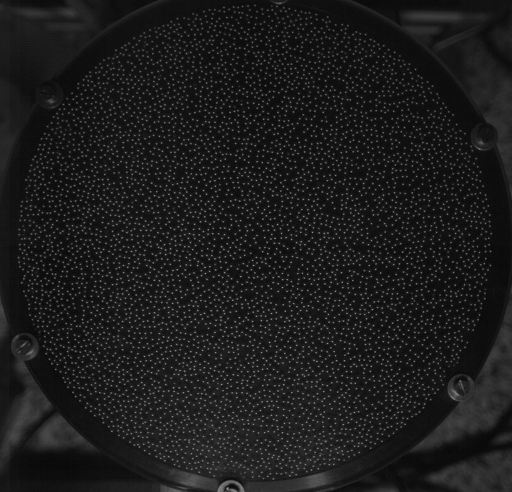

In [5]:
frames[0]

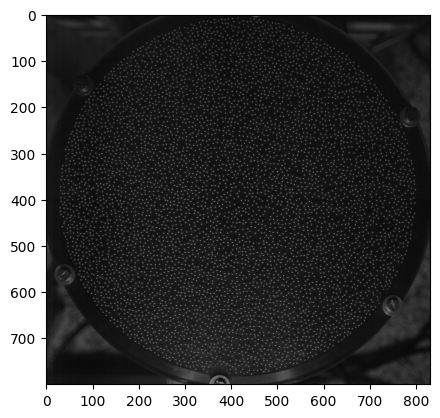

In [6]:
plt.imshow(frames[0],cmap='gray')
plt.show()

In [7]:
# creamos una mascara con ayuda de cv2 para eliminar todo lo externo al circulo

img = frames[0]

h, w = img.shape
x_c, y_c, r = w//2 - 3, h//2 -7 , 388  # ajustamos manualmente 

mask = np.zeros_like(img, dtype=np.uint8)
cv2.circle(mask, (x_c, y_c), r, 255, -1)

masked = cv2.bitwise_and(img, img, mask=mask)


In [8]:
fm = tp.locate(masked,7,separation=1.5,minmass=370) # se aconseja un numero impar grande (tras prueba y error he optado por el tamaño de 7)
fm.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
0,8.141669,413.925188,2455.450447,1.415687,0.179670,317.991815,9898.0,0.060901
1,9.065619,402.559781,2628.879927,1.400209,0.210641,344.165738,11054.0,0.054091
2,9.192989,441.309064,1636.929196,1.420738,0.193793,211.622664,8273.0,0.073995
3,10.019339,393.660553,2340.417666,1.328088,0.197169,347.050710,10303.0,0.058328
4,9.758234,449.600320,2653.615723,1.503947,0.098511,317.887224,11452.0,0.052086


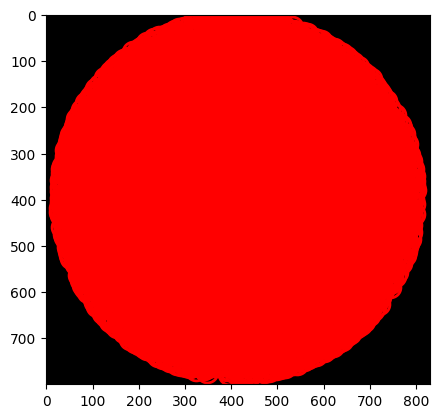

<Axes: >

In [9]:
tp.annotate(fm,masked)

In [10]:
f = tp.locate(frames[0],7,separation=1.5,minmass=130) # se aconseja un numero impar grande (tras prueba y error he optado por el tamaño de 7)
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,3.086075,253.782432,820.403891,1.803554,0.512460,71.444439,11024.0,0.095398,0
1,3.123826,444.299689,921.735238,1.835329,0.645119,108.661439,10751.0,0.100895,0
2,2.872270,572.333997,761.318634,1.808507,0.519906,63.181742,10552.0,0.105318,0
3,3.302239,574.029910,887.917448,1.903668,0.516151,67.191067,10306.0,0.111353,0
4,3.957747,250.983146,915.886852,1.919040,0.468026,67.888341,10889.0,0.098040,0


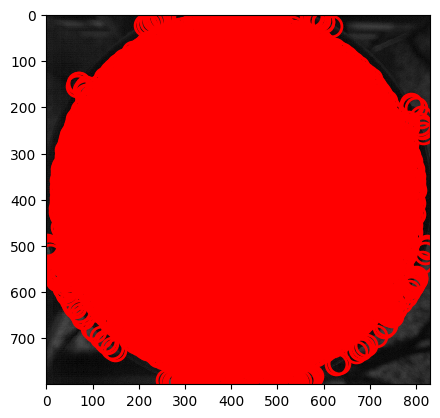

<Axes: >

In [11]:
tp.annotate(f,frames[0])

In [12]:

num_particles = len(f)
print(f"Número de partículas en este frame: {num_particles}")

num = len(fm)
print(f"Número de partículas en este frame: {num}")

Número de partículas en este frame: 5886
Número de partículas en este frame: 5634


C:\Users\lluan\AppData\Local\Temp\ipykernel_4296\237999615.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


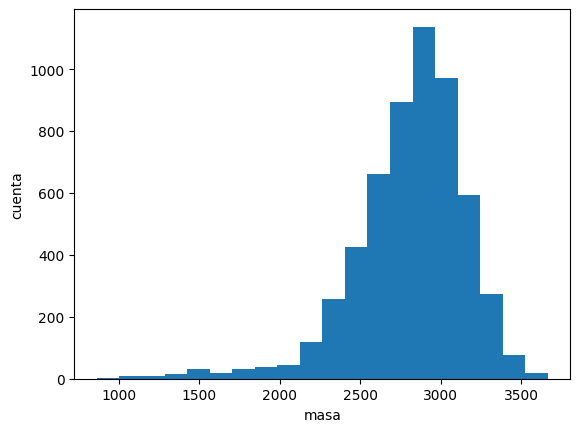

In [13]:
fig, ax = plt.subplots()

ax.hist(fm['mass'],bins=20)
ax.set(xlabel='masa', ylabel='cuenta')

fig.show()

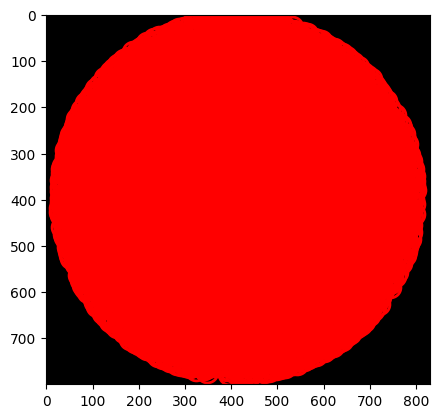

<Axes: >

In [14]:
f = tp.locate(masked,7,minmass=300,separation=1.5) # filtramos utilizando el valor de masa minimo para eliminar caracteristicas no deseadas
tp.annotate(f,masked)

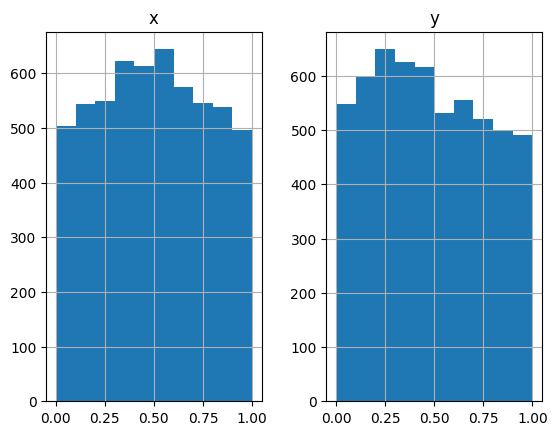

In [15]:
tp.subpx_bias(f) # observamos que NO aparecen caidas en el medio
plt.show()

# Trabajamos con todos los fotogramas

In [16]:
masked_frames = [cv2.bitwise_and(frame, frame, mask=mask) for frame in frames]
#f = tp.batch(frames[:100],7,minmass=300,separation=1.5)
f_sin_mask = tp.batch(masked_frames[:100],7,minmass=300,separation=1.5)

Frame 99: 5622 features


In [17]:
tp.quiet() 
t = tp.link(f_sin_mask,6,memory=5) # utilizamos un desplazamiento maximo entre frames de 6 pixeles y usamos 5 frames de memoria (numeros de frames que el programa guarda la id de la particula desaparecida)

In [18]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.141669,413.925188,2455.450447,1.415687,0.179670,317.991815,9898.0,0.060901,0,0
3761,498.390294,250.223000,3237.356097,1.334387,0.201624,490.209781,15266.0,0.038433,0,1
3760,496.904925,718.762902,2959.065321,1.269612,0.220073,478.643748,12202.0,0.048685,0,2
3759,496.770932,600.805213,3082.770447,1.278011,0.235516,486.819286,14216.0,0.041422,0,3
3758,496.669782,550.114749,2909.802912,1.283108,0.198578,465.221223,13512.0,0.043701,0,4


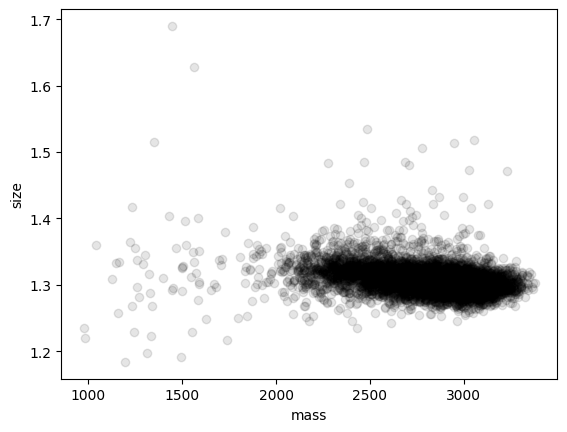

<Axes: xlabel='mass', ylabel='size'>

In [19]:
plt.figure()
tp.mass_size(t.groupby('particle').mean()) # graficamos el tamaño versus la 'masa'

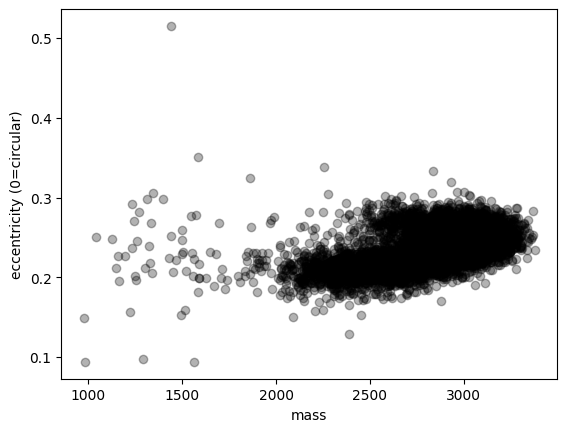

<Axes: xlabel='mass', ylabel='eccentricity (0=circular)'>

In [20]:
plt.figure()
tp.mass_ecc(t.groupby('particle').mean())

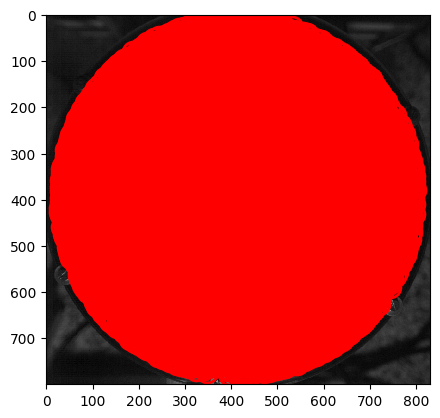

Número de partículas en el frame 0: 5634


In [21]:
t2 = t[((t['mass'] > 300) & (t['size'] < 2) &
         (t['ecc'] < 0.7))]

plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0])


num_particles = len(t2[t2['frame'] == 0])
print(f"Número de partículas en el frame 0: {num_particles}")

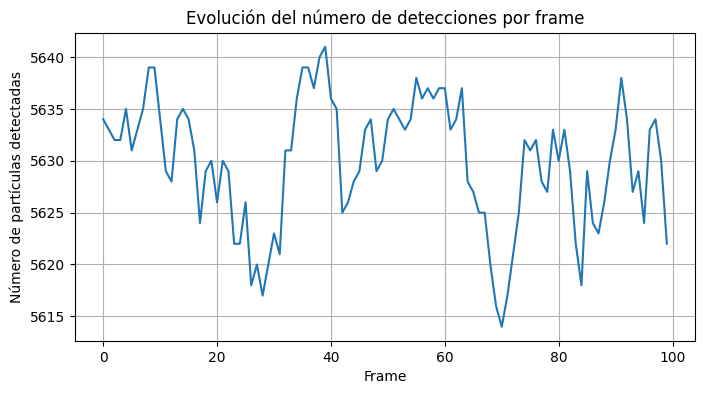

5629.88


In [22]:
counts = t2.groupby('frame').size()
plt.figure(figsize=(8,4))
counts.plot()
plt.xlabel('Frame')
plt.ylabel('Número de partículas detectadas')
plt.title('Evolución del número de detecciones por frame')
plt.grid(True)
plt.show()

print(counts.mean())

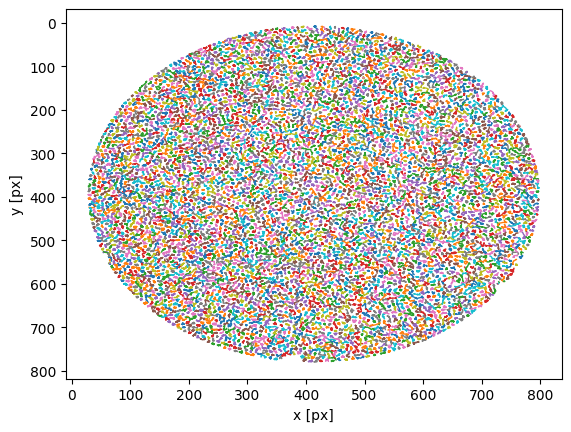

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [23]:
plt.plot()
tp.plot_traj(t2)

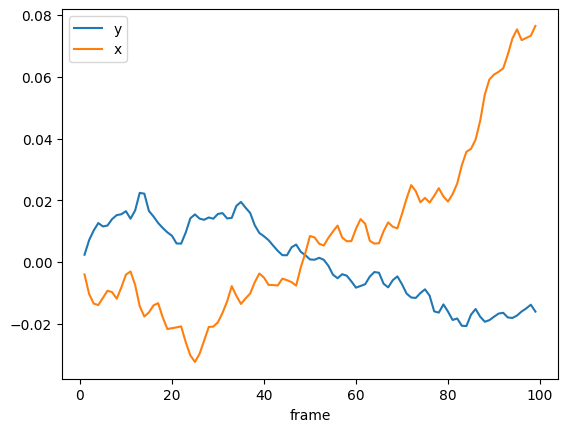

In [24]:
d = tp.compute_drift(t2)

d.plot()
plt.show()

In [25]:
'''
tm = tp.subtract_drift(t2.copy(), d) 

ax  =  tp . plot_traj ( tm ) 
plt . show ()
'''

'\ntm = tp.subtract_drift(t2.copy(), d) \n\nax  =  tp . plot_traj ( tm ) \nplt . show ()\n'

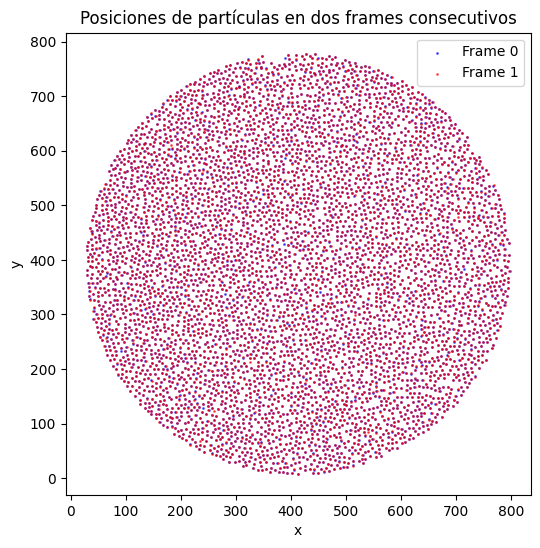

In [26]:
f0 = t2[t2['frame'] == 0]
f1 = t2[t2['frame'] == 1]

plt.figure(figsize=(6,6))
plt.scatter(f0['x'], f0['y'], color='blue', label=f'Frame {0}', alpha=0.6,s=1)
plt.scatter(f1['x'], f1['y'], color='red', label=f'Frame {1}', alpha=0.6,s=1)

ids = pd.concat([f0['particle'], f1['particle']]).unique()

for p in ids:
    trayectoria = t2[(t2['particle'] == p) & (t2['frame'].isin([0,1]))]
    plt.plot(trayectoria['x'], trayectoria['y'], color='black', alpha=0.4, linewidth=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Posiciones de partículas en dos frames consecutivos')
plt.show()